In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

import notebook_functions

In [2]:
def black_background_using_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_mask = np.zeros_like(image)
    cv2.drawContours(contour_mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    mask_inv = cv2.bitwise_not(contour_mask[:,:,0])
    return cv2.bitwise_and(image, image, mask=mask_inv)

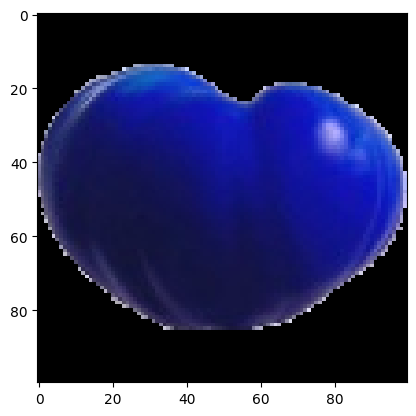

In [3]:
# MAKE TOMATOES FROM FRUITS-3D dataset to have black background
output_dir = './tomato_horizontal_rotation/obj0000/'
os.makedirs(output_dir, exist_ok=True)
image_files = [file for file in os.listdir("./tomato_horizontal_rotation/original_imgs")]  # Get list of all img names inside of folder

for image_name in image_files:
    result_folder = os.path.join(output_dir, os.path.splitext(image_name)[0] + '.png')
    file_path = os.path.join("./tomato_horizontal_rotation/original_imgs/", image_name)

    image = cv2.imread(file_path)
    result = black_background_using_contours(image)
    plt.imshow(result)
    cv2.imwrite(result_folder, result)

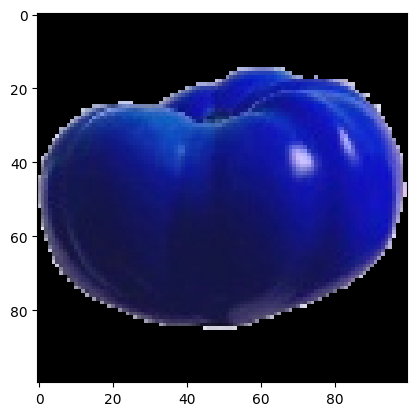

In [5]:
img = cv2.imread("./tomato_horizontal_rotation/obj0000/106_100.png")
plt.imshow(img)